In [ ]:
%matplotlib inline
from google.colab import files
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [ ]:
!unzip '/content/leapGestRecog.zip'

In [38]:
imagepaths = []

for root, dirs, files in os.walk("/content/leapGestRecog", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): 
      imagepaths.append(path)

print(len(imagepaths))

6000


In [18]:
def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


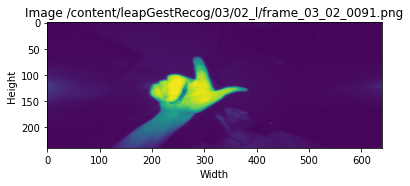

In [27]:
plot_image(imagepaths[3899]) 

In [28]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = cv2.imread(path) # Reads image and returns np.array
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  
  # Processing label in image path
  category = path.split("/")[4]
  label = int(category.split("_")[0][1]) 
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) 
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  6000
Labels loaded:  6000
3 /content/leapGestRecog/08/03_fist/frame_08_03_0192.png


In [30]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [31]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [32]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [33]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [34]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
66/66 - 263s - loss: 1.3111 - accuracy: 0.9162 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 2/5
66/66 - 260s - loss: 0.0019 - accuracy: 0.9998 - val_loss: 1.9253e-04 - val_accuracy: 1.0000
Epoch 3/5
66/66 - 263s - loss: 3.3334e-05 - accuracy: 1.0000 - val_loss: 7.8182e-05 - val_accuracy: 1.0000
Epoch 4/5
66/66 - 260s - loss: 1.2815e-05 - accuracy: 1.0000 - val_loss: 5.6537e-05 - val_accuracy: 1.0000
Epoch 5/5
66/66 - 260s - loss: 7.5055e-06 - accuracy: 1.0000 - val_loss: 4.5471e-05 - val_accuracy: 1.0000


In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

57/57 [==============================] - 27s 471ms/step - loss: 4.5471e-05 - accuracy: 1.0000
Test accuracy: 100.00%


In [36]:
predictions = model.predict(X_test)

In [37]:
np.argmax(predictions[0]), y_test[0]

(1, 1)